In [1]:
import os 
import sys



import seaborn as sns
import matplotlib.pyplot as plt
import re

import numpy as np
import pandas as pd


#NLP
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

#modeling 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score ,accuracy_score,mean_squared_error,recall_score,f1_score,precision_score,confusion_matrix,roc_curve, classification_report
from sklearn.model_selection import train_test_split


C:\Users\cast6\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cast6\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Data Set

In [2]:
os.chdir("C:\DataScience_DSC_680\project1")

In [3]:
spam_ham_df = pd.read_csv("spam_ham_dataset.csv")

In [4]:
spam_org = spam_ham_df.copy()

In [5]:
spam_ham_df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
spam_ham_df = spam_ham_df.drop(['Unnamed: 0'] , axis=1)
spam_ham_df.head(5)

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:

spam_ham_df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [8]:
spam_ham_df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


C:\Users\cast6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


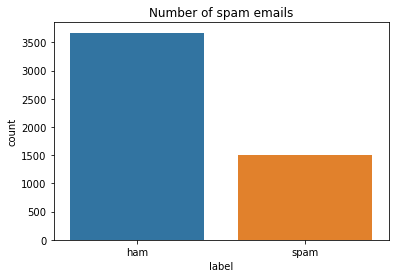

In [9]:
plt.title("Number of spam emails")

df_label = sns.countplot(spam_ham_df['label'])
df_label.set_xticklabels(spam_ham_df['label'].unique())

plt.show()

In [10]:
# None spam email 1

spam_ham_df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [11]:
#spam email

spam_ham_df['text'][3]

'Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n'

# Data Preperation

In [12]:
import string 

def cleaning(text):
    
    #removing the word subject, checking for spam inside the subject line all emails contain the word subject
    
    text = text.replace("Subject" , "")
    
    #making all text lower case 
    text_m = text.lower()
    
    #removing spaces
    text = re.sub('\s+',' ',text)
    
    #removing hyper links
    text = text.replace("http://" , " ").replace("https://" , " ")
    
    
    #taking alll punctiation like : !
    text = text.translate(str.maketrans("","", string.punctuation))
    
     #removingmbers
    text = re.sub(r"\d+", "", text)
    
    return text

In [13]:
 spam_ham_df['cleaned_txt'] = spam_ham_df['text'].apply(lambda x : cleaning(x))



In [14]:
#more changes are possible copying the data to df and keeping original 
df = spam_ham_df.copy()

In [15]:
df.head()

,label,text,label_num,cleaned_txt
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter this is a follow up ...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom for january see attached file hp...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho we re around to that ...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trend...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,re indian springs this deal is to book the t...


In [16]:
df['cleaned_txt'][0]

' enron methanol  meter    this is a follow up to the note i gave you on monday        preliminary flow data provided by daren   please override pop  s daily volume  presently zero  to reflect daily activity you can obtain from gas control  this change is needed asap for economics purposes '

In [17]:
#Changing label to not-spam eather then ham
df['label'] = df['label'].replace(['ham'] , 'not-spam')

In [17]:
df.head()

,label,text,label_num,cleaned_txt
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter this is a follow up ...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom for january see attached file hp...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho we re around to that ...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trend...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,re indian springs this deal is to book the t...


In [211]:
#stopwords.words('english')

In [18]:
#removing stop words

def stop_words_removal(text):
    txt = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    
    return txt 
    





In [19]:
 #removing stop words
    
df['cleaned_txt'] = df['cleaned_txt'].apply(lambda x : stop_words_removal(x))


In [20]:
df.head(5)

,label,text,label_num,cleaned_txt
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january see attached file hplnol xls h...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time ye...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,indian springs deal book teco pvr revenue unde...


In [21]:
# Before 
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [23]:
# After 
df['cleaned_txt'][3]

'photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin'

# Checking for meaning inside the sentences

In [24]:
lemmatizer = WordNetLemmatizer()
def lemm_sentence(text):
    word_list = nltk.word_tokenize(text)
    lem_out = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lem_out

In [25]:
df['cleaned_txt'] = df['cleaned_txt'].apply(lambda x : lemm_sentence(x))

In [26]:
df.head(5)

,label,text,label_num,cleaned_txt
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january see attached file hplnol xl hp...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time ye...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop window office cheap main trending ab...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenue under...


In [27]:
df['cleaned_txt'][3]

'photoshop window office cheap main trending abasement darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clear bayda inconveniencing managing represented smartness hashish academy shareholder unload badness danielson pure caffein spaniard chargeable levin'

# Most Used Words In Spam Emails

In [ ]:
#!{sys.executable} -m pip install WordCloud

In [39]:
from wordcloud import WordCloud
wc= WordCloud(width =2000, height=2000,min_font_size=10, background_color='white')

In [40]:
spam_wc= wc.generate(df[df['label']=='spam']['cleaned_txt'].str.cat(sep=" "))

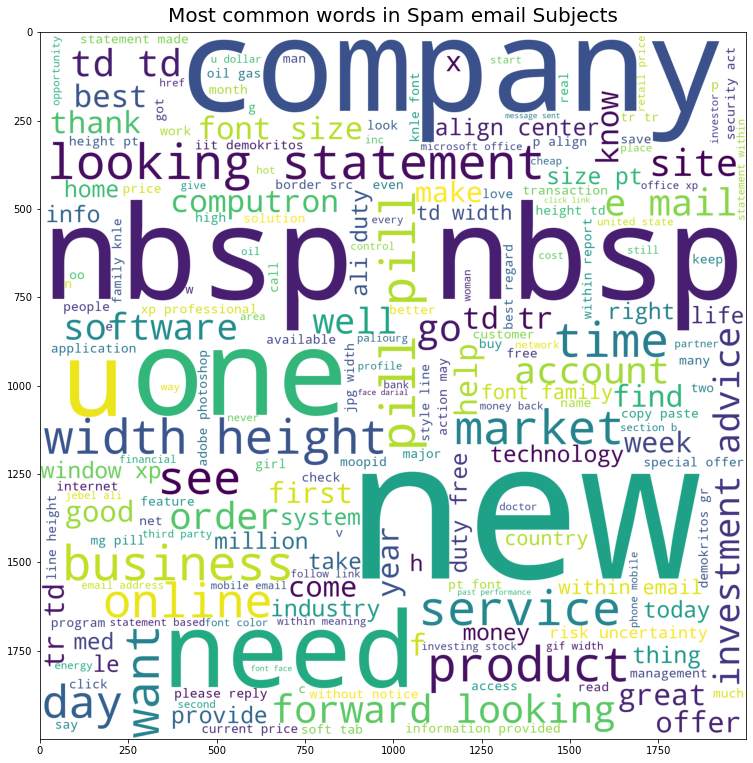

In [41]:
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Subjects", fontdict={'size': 20, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.imshow(spam_wc)

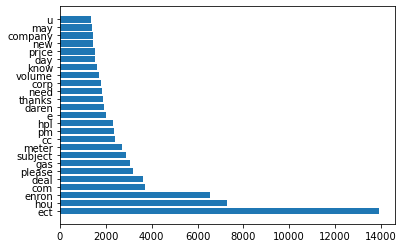

In [43]:
#Getting the most used words

words = []
def spam_word_count():
    for line in df['cleaned_txt']:
        words.extend(line.split())
        
spam_word_count() 
        
from collections import Counter
counts = Counter(words)

top25 = counts.most_common(25)


words = []
count = []

for item in top25:
    words.append(item[0])
    count.append(item[1])

plt.barh(words, count)

plt.show()





In [ ]:
#Perparing Model

In [44]:
df_model = df.copy()
df_model = df_model.drop(['text'], axis= 1)

In [45]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df_model['cleaned_txt'])
y = df_model['label']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2)

# Building Models

# Naive Bayes Model

In [239]:
naive_model = MultinomialNB()
naive_model.fit(x_train, y_train)

MultinomialNB()

In [241]:
predict_naive = naive_model.predict(x_test)

In [243]:
print("Accuracy score for multinomialNB Model" , accuracy_score(y_test, predict_naive)*100) 

Accuracy score for multinomialNB Model 92.7536231884058


# Radom Forest Classifer

In [244]:
rf_model = RandomForestClassifier(n_estimators = 50)
rf_model.fit(x_train , y_train)

RandomForestClassifier(n_estimators=50)

In [245]:
predict_rf = rf_model.predict(x_test)

In [246]:
print("Accuracy score for random forest Model" , accuracy_score(y_test, predict_rf )*100) 

Accuracy score for random forest Model 97.58454106280193


# Evaluation 

In [250]:
print(classification_report(y_test,predict_naive))

              precision    recall  f1-score   support

    not-spam       0.91      1.00      0.95       738
        spam       1.00      0.75      0.86       297

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035



In [252]:
results = confusion_matrix(y_test,predict_naive)
results

array([[737,   1],
       [ 74, 223]], dtype=int64)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

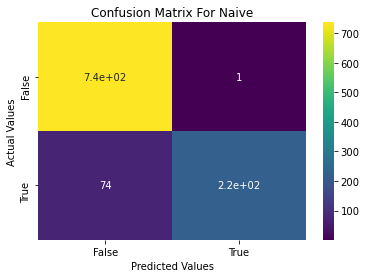

In [253]:
#setting up heat map
cr = sns.heatmap(results, annot= True, cmap='viridis')
cr.set_title('Confusion Matrix For Naive')
cr.set_xlabel('Predicted Values')
cr.set_ylabel('Actual Values')


cr.xaxis.set_ticklabels(['False', 'True'])
cr.yaxis.set_ticklabels(['False', 'True'])

In [251]:
print(classification_report(y_test,predict_rf ))

              precision    recall  f1-score   support

    not-spam       0.99      0.97      0.98       738
        spam       0.93      0.99      0.96       297

    accuracy                           0.98      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [254]:
results = confusion_matrix(y_test,predict_rf)
results

array([[717,  21],
       [  4, 293]], dtype=int64)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

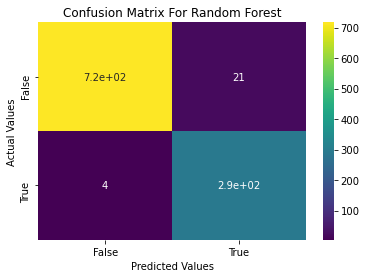

In [256]:
#setting up heat map
cr = sns.heatmap(results, annot= True, cmap='viridis')
cr.set_title('Confusion Matrix For Random Forest')
cr.set_xlabel('Predicted Values')
cr.set_ylabel('Actual Values')


cr.xaxis.set_ticklabels(['False', 'True'])
cr.yaxis.set_ticklabels(['False', 'True'])